In [16]:
!pip install pymysql

In [17]:
pip install pandas numpy sqlalchemy scikit-learn matplotlib seaborn streamlit

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Establishing a connection for MySQL and Data Download from MySQL to Jupyter Notebook:
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Vizag!23', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM iris.iris"
    df = pd.read_sql(query, conn)
    print("Data downloaded from MySQL successfully!")

    # Display the results
    print('Connection successful. Here is your data :')
    
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame information:")
    print(df.info())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

Data downloaded from MySQL successfully!
Connection successful. Here is your data :

First 5 rows of the DataFrame:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-nu


Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Summary statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


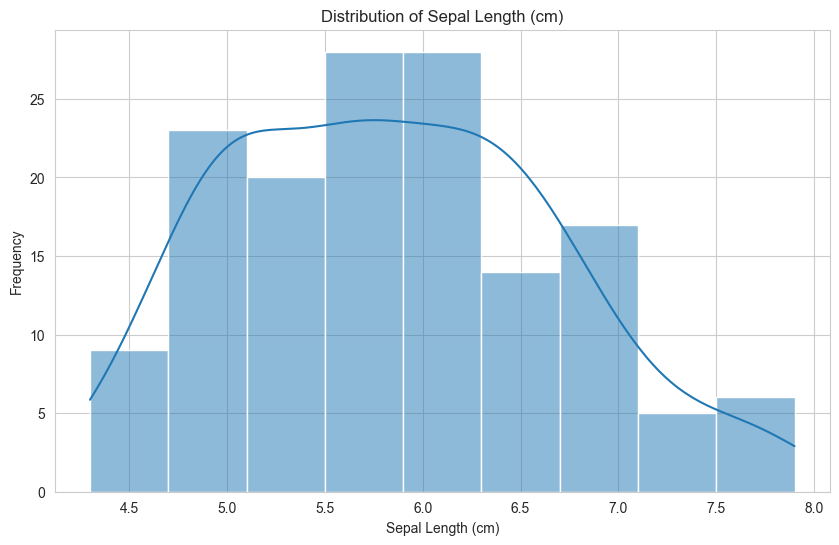

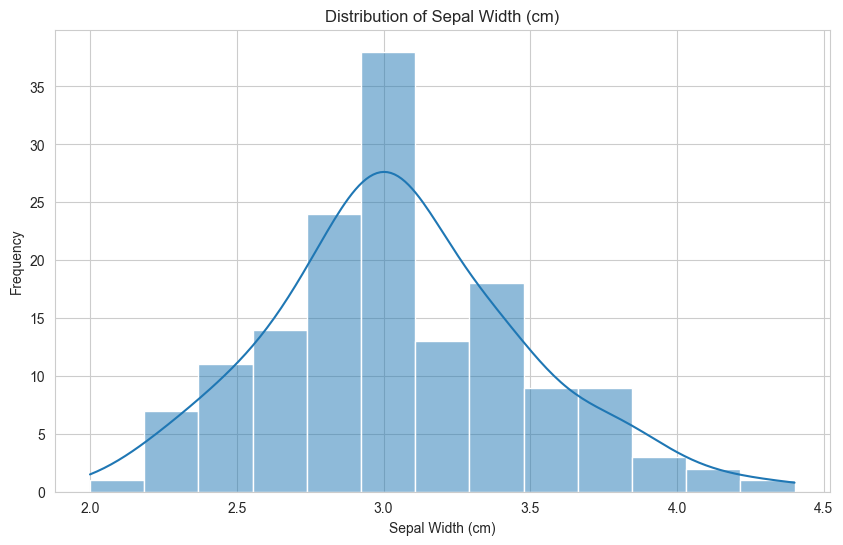

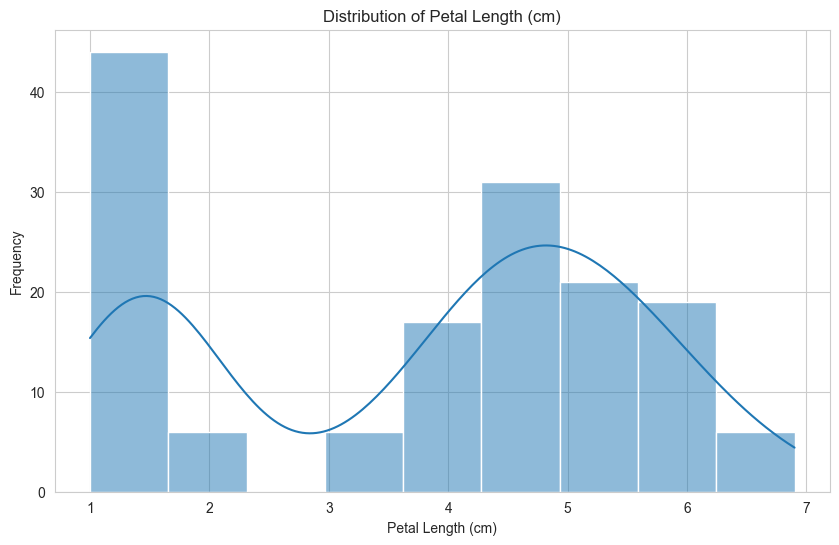

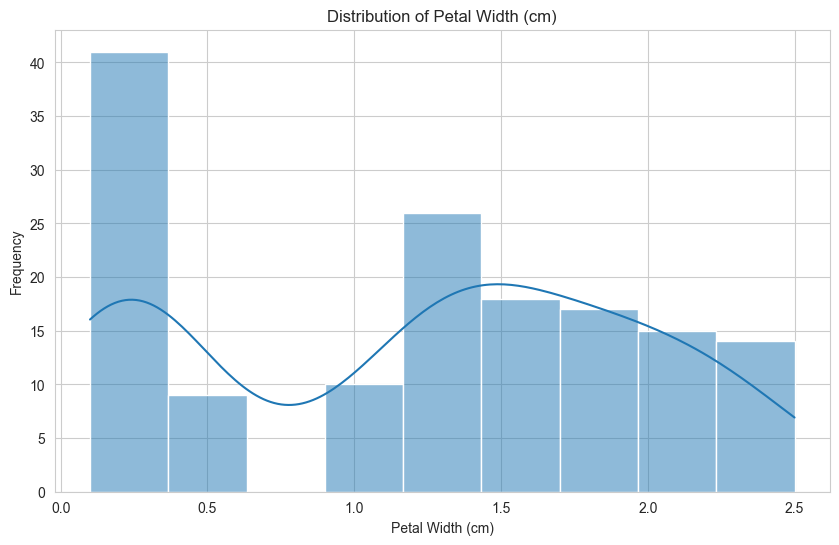

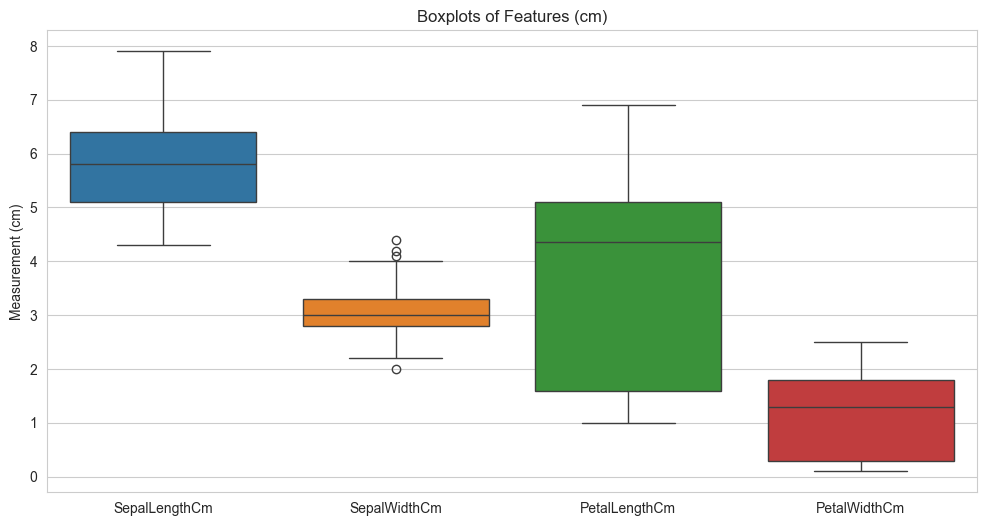

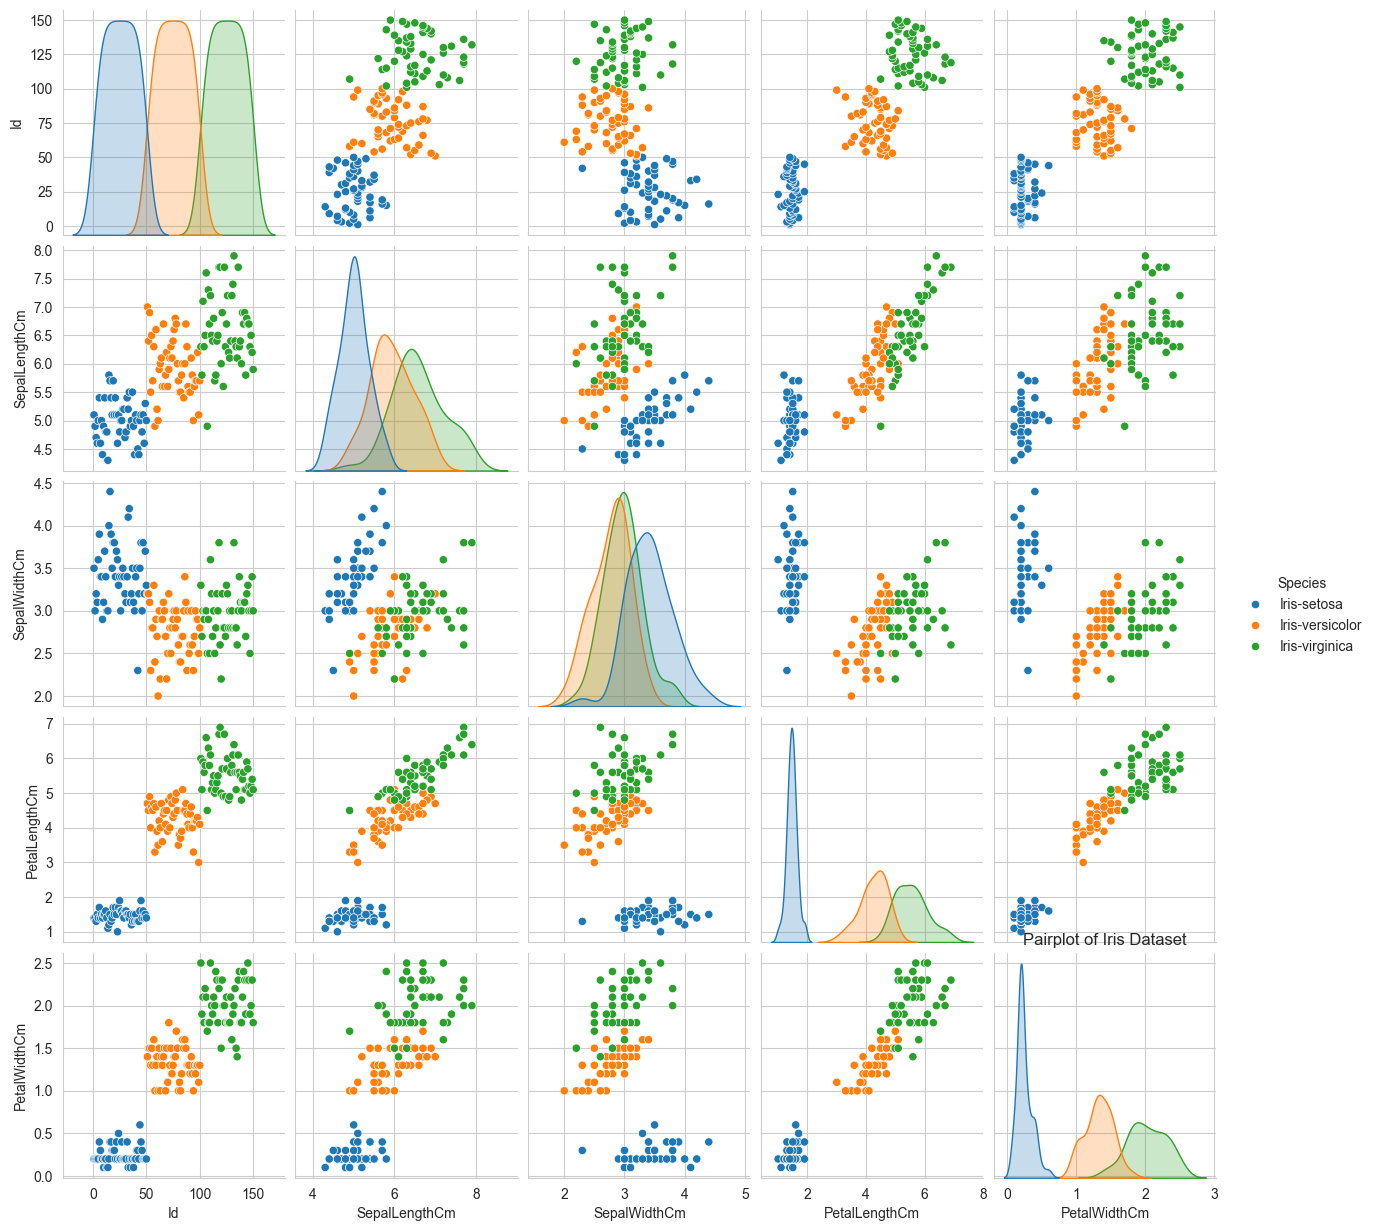

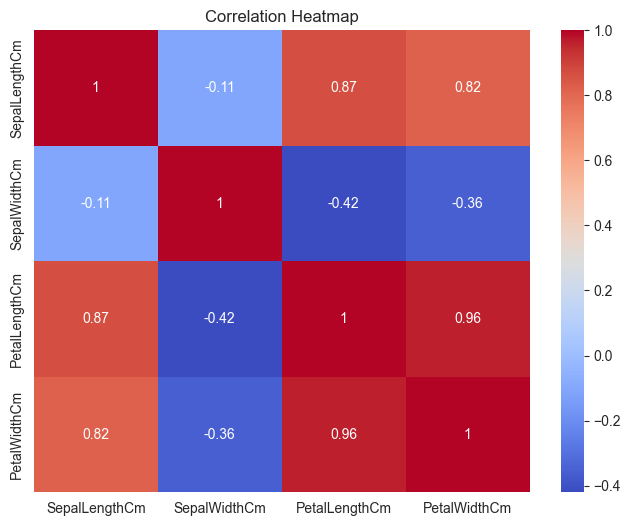

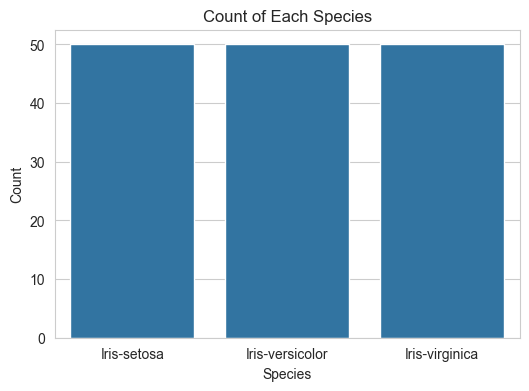

In [33]:
# Exploratory Data Analysis (EDA):

# --- Missing Values ---
print("\nMissing values:")
print(df.isnull().sum())

# --- Summary Statistics ---
print("\nSummary statistics:")
print(df.describe())

# --- Histograms ---
plt.figure(figsize=(10, 6))
sns.histplot(df['SepalLengthCm'], kde=True)
plt.title('Distribution of Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['SepalWidthCm'], kde=True)
plt.title('Distribution of Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['PetalLengthCm'], kde=True)
plt.title('Distribution of Petal Length (cm)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['PetalWidthCm'], kde=True)
plt.title('Distribution of Petal Width (cm)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# --- Boxplots ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.title('Boxplots of Features (cm)')
plt.ylabel('Measurement (cm)')
plt.show()

# --- Pairplot ---
sns.pairplot(df, hue='Species')
plt.title('Pairplot of Iris Dataset')
plt.show()

# --- Correlation Heatmap ---
correlation_matrix = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- Bar and Count Plot (for categorical data - 'Species') ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df)
plt.title('Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [35]:
# Step 4: Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'Species' column (categorical to numerical)
label_encoder = LabelEncoder()
df['SpeciesEncoded'] = label_encoder.fit_transform(df['Species'])

# Scale numerical features
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nDataFrame after encoding and scaling:")
print(df.head())


DataFrame after encoding and scaling:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1      -0.900681      1.032057      -1.341272     -1.312977  Iris-setosa   
1   2      -1.143017     -0.124958      -1.341272     -1.312977  Iris-setosa   
2   3      -1.385353      0.337848      -1.398138     -1.312977  Iris-setosa   
3   4      -1.506521      0.106445      -1.284407     -1.312977  Iris-setosa   
4   5      -1.021849      1.263460      -1.341272     -1.312977  Iris-setosa   

   SpeciesEncoded  
0               0  
1               0  
2               0  
3               0  
4               0  


In [36]:
# Step 5: Model Building
# Define features (X) and target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['SpeciesEncoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on the test set: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [38]:
# Step 6: Model Saving
import joblib
# Save the trained model
model_filename = 'iris_model.pkl'
joblib.dump(model, model_filename)
print(f"\nTrained model saved as {model_filename}")

# Save the scaler
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")

# Save the label encoder (optional, but good practice if you need to interpret predictions)
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label encoder saved as {label_encoder_filename}")


Trained model saved as iris_model.pkl
Scaler saved as scaler.pkl
Label encoder saved as label_encoder.pkl
